In [1]:
import tensorflow as tf
import numpy as np
import pickle
np.random.seed(7)

In [2]:
with open ('C:\\Users\\Wilfred\\Desktop\\Look-ahead-N\\input_layer_4_6_12_3.pickle','rb') as file:
    input_data = pickle.load(file)
permutation = list(np.random.permutation(input_data.shape[0]))
input_data = input_data[permutation,:]
print(input_data.shape)
x_train = input_data[:100000, :]
x_test = input_data[100000:105000, :]


(105000, 24)


In [3]:
with open ('C:\\Users\\Wilfred\\Desktop\\Look-ahead-N\\output_layer_4_6_12_3.pickle','rb') as file:
    output_data = pickle.load(file)
output_data = np.transpose(output_data)
output_data = output_data[permutation,:]
y_train = output_data[:100000, :]
y_test = output_data[100000:105000, :]
print(output_data.shape)

(105000, 12)


In [5]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(180, input_shape = [24], activation = 'relu'),
    tf.keras.layers.Dense(180, activation = 'relu'),
    tf.keras.layers.Dense(180, activation = 'relu'),
    tf.keras.layers.Dense(180, activation = 'relu'),
    tf.keras.layers.Dense(12, activation = 'sigmoid')
])
adam = tf.keras.optimizers.Adam(lr = 0.005)
model.compile(optimizer = adam, loss = 'binary_crossentropy', metrics = ['accuracy'])

history = model.fit(x_train, y_train, batch_size = 1024, epochs = 100, verbose = 2, validation_data = (x_test, y_test))


Train on 100000 samples, validate on 5000 samples
Epoch 1/100
100000/100000 - 3s - loss: 0.3198 - accuracy: 0.8679 - val_loss: 0.2683 - val_accuracy: 0.8867
Epoch 2/100
100000/100000 - 2s - loss: 0.2591 - accuracy: 0.8894 - val_loss: 0.2519 - val_accuracy: 0.8912
Epoch 3/100
100000/100000 - 3s - loss: 0.2405 - accuracy: 0.8958 - val_loss: 0.2389 - val_accuracy: 0.8971
Epoch 4/100
100000/100000 - 3s - loss: 0.2183 - accuracy: 0.9062 - val_loss: 0.2144 - val_accuracy: 0.9083
Epoch 5/100
100000/100000 - 3s - loss: 0.1976 - accuracy: 0.9149 - val_loss: 0.1988 - val_accuracy: 0.9135
Epoch 6/100
100000/100000 - 3s - loss: 0.1835 - accuracy: 0.9196 - val_loss: 0.1831 - val_accuracy: 0.9187
Epoch 7/100
100000/100000 - 3s - loss: 0.1679 - accuracy: 0.9243 - val_loss: 0.1703 - val_accuracy: 0.9238
Epoch 8/100
100000/100000 - 3s - loss: 0.1583 - accuracy: 0.9279 - val_loss: 0.1609 - val_accuracy: 0.9261
Epoch 9/100
100000/100000 - 2s - loss: 0.1485 - accuracy: 0.9317 - val_loss: 0.1538 - val_accu

Epoch 77/100
100000/100000 - 3s - loss: 0.0250 - accuracy: 0.9906 - val_loss: 0.0712 - val_accuracy: 0.9777
Epoch 78/100
100000/100000 - 3s - loss: 0.0272 - accuracy: 0.9898 - val_loss: 0.0777 - val_accuracy: 0.9763
Epoch 79/100
100000/100000 - 3s - loss: 0.0239 - accuracy: 0.9911 - val_loss: 0.0771 - val_accuracy: 0.9786
Epoch 80/100
100000/100000 - 3s - loss: 0.0235 - accuracy: 0.9913 - val_loss: 0.0719 - val_accuracy: 0.9782
Epoch 81/100
100000/100000 - 3s - loss: 0.0242 - accuracy: 0.9909 - val_loss: 0.0796 - val_accuracy: 0.9767
Epoch 82/100
100000/100000 - 3s - loss: 0.0257 - accuracy: 0.9904 - val_loss: 0.0824 - val_accuracy: 0.9764
Epoch 83/100
100000/100000 - 3s - loss: 0.0277 - accuracy: 0.9899 - val_loss: 0.0760 - val_accuracy: 0.9776
Epoch 84/100
100000/100000 - 3s - loss: 0.0260 - accuracy: 0.9903 - val_loss: 0.0764 - val_accuracy: 0.9777
Epoch 85/100
100000/100000 - 3s - loss: 0.0212 - accuracy: 0.9921 - val_loss: 0.0757 - val_accuracy: 0.9789
Epoch 86/100
100000/100000 -

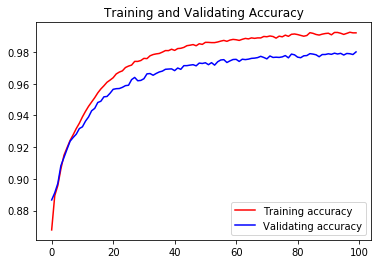

In [7]:
import matplotlib.pyplot as plt
plt.figure()
acc = history.history['accuracy']
loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label = 'Training accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validating accuracy')
plt.title('Training and Validating Accuracy')
#plt.title('Training Accuracy')
plt.legend()
plt.show()

In [8]:
#model.evaluate(x_test, y_test, verbose = 2)

5000/1 - 0s - loss: 0.0630 - accuracy: 0.9720


[0.04715186712741852, 0.9720002]

In [8]:
model.save('C:\\Users\\Wilfred\\Desktop\\weights\\Look_ahead_N\\Look_ahead_N_4_6_12_3_model.h5')